In [2]:
import pandas as pd
from upsetplot import plot, from_indicators
import matplotlib.pyplot as plt
from helpers import *
import matplotlib.font_manager as font_manager


In [6]:
# Add Arial 
# Will differ by system, may need to install Arial font
font_manager.fontManager.addfont("/usr/share/fonts/truetype/arial/ARIAL.TTF")


In [4]:
adrc_cs_data_path = "./data_out/adrc_complete_final.tsv"
dust_cs_data_path = "./data_out/dust_complete_final.tsv"
iss_cs_data_path = "./data_out/iss_complete_final.tsv"
rosmap_cs_data_path = "./data_out/rosmap_data_final_output.tsv"

adrc_cs_upset = cs_output_to_upset(adrc_cs_data_path)
dust_cs_upset = cs_output_to_upset(dust_cs_data_path)
iss_cs_upset = cs_output_to_upset(iss_cs_data_path)
rosmap_cs_upset = cs_output_to_upset(rosmap_cs_data_path)

print("Length of original adrc data: ", len(adrc_cs_upset))
print("Length of original dust data: ", len(dust_cs_upset))
print("Length of original iss data: ", len(iss_cs_upset))
print("Length of original rosmap data: ", len(rosmap_cs_upset))
print()

adrc_cs_upset["ENDOGENOUS"][347] = adrc_cs_upset["ENDODGENOUS"][347]
adrc_cs_upset.drop("ENDODGENOUS", axis=1, inplace=True)

adrc_cs_upset.drop(columns=["INFO"],inplace=True)
dust_cs_upset.drop(columns=["INFO"],inplace=True)
iss_cs_upset.drop(columns=["INFO"],inplace=True)
rosmap_cs_upset.drop(columns=["INFO"],inplace=True)

adrc_cs_upset["summed"] = adrc_cs_upset.select_dtypes(include=['int']).sum(axis=1)
adrc_cs_upset = adrc_cs_upset[adrc_cs_upset.summed != 0]
dust_cs_upset["summed"] = dust_cs_upset.select_dtypes(include=['int']).sum(axis=1)
dust_cs_upset = dust_cs_upset[dust_cs_upset.summed != 0]
iss_cs_upset["summed"] = iss_cs_upset.select_dtypes(include=['int']).sum(axis=1)
iss_cs_upset = iss_cs_upset[iss_cs_upset.summed != 0]
rosmap_cs_upset["summed"] = rosmap_cs_upset.select_dtypes(include=['int']).sum(axis=1)
rosmap_cs_upset = rosmap_cs_upset[rosmap_cs_upset.summed != 0]

adrc_cs_upset.drop(columns=["summed"],inplace=True)
dust_cs_upset.drop(columns=["summed"],inplace=True)
iss_cs_upset.drop(columns=["summed"],inplace=True)
rosmap_cs_upset.drop(columns=["summed"],inplace=True)

adrc_cs_upset = adrc_cs_upset.replace({1: True, 0: False})
dust_cs_upset = dust_cs_upset.replace({1: True, 0: False})
iss_cs_upset = iss_cs_upset.replace({1: True, 0: False})
rosmap_cs_upset = rosmap_cs_upset.replace({1: True, 0: False})

upset_list = [adrc_cs_upset, dust_cs_upset, iss_cs_upset, rosmap_cs_upset]
upset_names_list = ["adrc_cs_upsetplot", "dust_cs_upsetplot", "iss_cs_upsetplot", "rosmap_cs_upsetplot"]

print("Length of adrc data after dropping INFO: ", len(adrc_cs_upset))
print("Length of dust data after dropping INFO: ", len(dust_cs_upset))
print("Length of iss data after dropping INFO: ", len(iss_cs_upset))
print("Length of rosmap data after dropping INFO: ", len(rosmap_cs_upset))
print()


Length of original adrc data:  463
Length of original dust data:  334
Length of original iss data:  73
Length of original rosmap data:  153

Length of adrc data after dropping INFO:  312
Length of dust data after dropping INFO:  230
Length of iss data after dropping INFO:  46
Length of rosmap data after dropping INFO:  117



/home/prajitrr/Documents/GitHub/rosmap_dataset_analysis/helpers.py:257: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  one_hot_encoded.fillna(0, inplace=True)
/home/prajitrr/Documents/GitHub/rosmap_dataset_analysis/helpers.py:257: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  one_hot_encoded.fillna(0, inplace=True)
/home/prajitrr/Documents/GitHub/rosmap_dataset_analysis/helpers.py:257: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. 

/home/prajitrr/miniconda3/envs/chemsource/lib/python3.13/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/home/prajitrr/miniconda3/envs/chemsource/lib/python3.13/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which

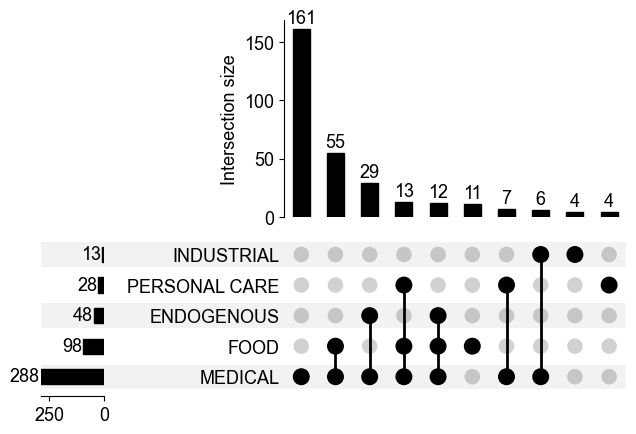

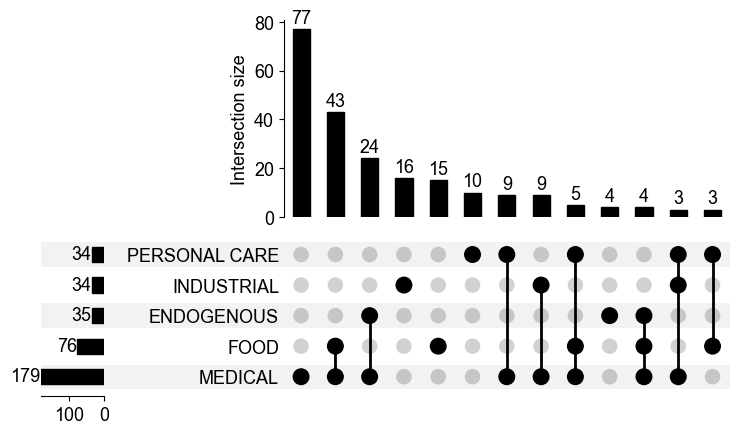

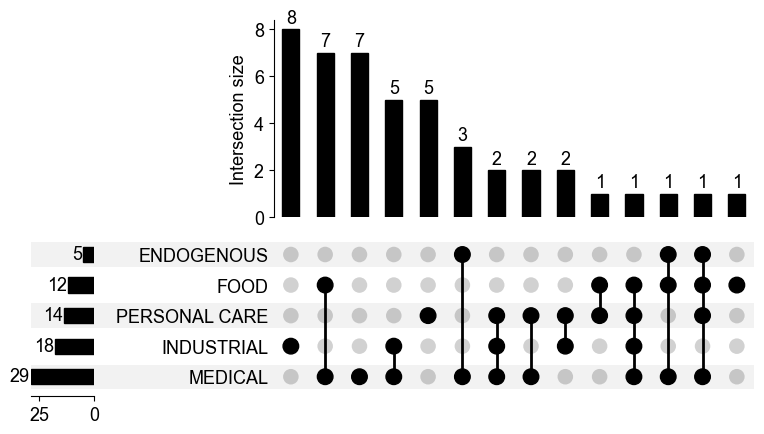

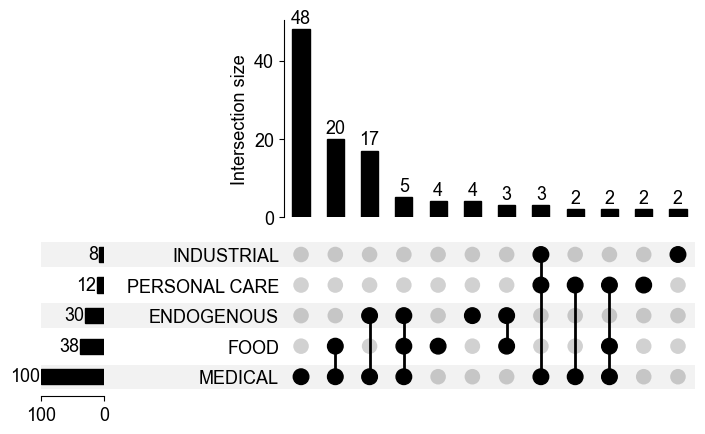

In [13]:
for i, plot_data in enumerate(upset_list):
    plt.rcParams.update({'font.size': 13})
    plt.rcParams['font.family'] = ['Arial', 'sans-serif']
    fig = plot(from_indicators(plot_data),subset_size="count",show_counts=True,min_subset_size="1%", sort_by='cardinality')
    ax = fig["intersections"]
    ax.grid(False, axis='y')
    ax2 = fig["totals"]
    ax2.xaxis.grid(False)
    fig_name = upset_names_list[i]
    plt.savefig(f"./figures/{fig_name}.svg", format="svg")

In [11]:
adrc_cs_data = pd.read_csv(adrc_cs_data_path, sep="\t", index_col=0, usecols=["compound_name", "synonyms", "text_length", "classification"])
adrc_cs_data = adrc_cs_data[adrc_cs_data["classification"] == "INFO"]
adrc_cs_data_misclassed = adrc_cs_data[adrc_cs_data["text_length"] != 0]
adrc_cs_data_misclassed

,synonyms,text_length,classification
compound_name,,,
26821-93-2,['(1-methyl-2-phenyl-1h-indol-3-yl)(phenyl)met...,1495,INFO
N2-(1-oxododecyl)-l-lysine,"['N-lauroyl-dl-lysine', 'N-lauroyl lysine', 'E...",513,INFO
54739-30-9,"['(9z,11e)-13-oxooctadeca-9,11-dienoic acid', ...",12,INFO
6114-21-2,"['Ethyl (9e,12e)-octadeca-9,12-dienoate', 'Del...",676,INFO
Alanyl-l-norleucine,"['Norleucine, alanyl-', 'Norleucine, l-alanyl-...",1072,INFO
5470-37-1,"['Tetrahydroharman-3-carboxylic acid', 'Harman...",572,INFO
Alpha-linolenoyl ethanolamide,"['N-linolenoylethanolamine', '(9z,12z,15z)-n-(...",32,INFO
H-ile-leu-oh,"['Ile-leu', 'Isoleucyl-leucine', 'Leucine, l-i...",2042,INFO
H-leu-phe-oh,"['Leu-phe', 'Leucyl-phenylalanine', 'Leucyl-l-...",1554,INFO


In [7]:
adrc_cs_data

,synonyms,classification
compound_name,,
Quetiapine,"['quetiapine', '111974-69-7', 'Seroquel', 'Que...",MEDICAL
Raloxifene,"['raloxifene', '84449-90-1', 'Keoxifene', 'Ral...",MEDICAL
Mannitol,"['D-mannitol', 'mannitol', '69-65-8', 'Mannite...","MEDICAL, FOOD, PERSONAL CARE"
Pheophorbide a,"['Pheophorbide a', '15664-29-6', 'Phaeophorbid...","MEDICAL, FOOD"
Hippuric acid,"['Hippuric acid', '2-Benzamidoacetic acid', '4...","ENDOGENOUS, MEDICAL"
...,...,...
"N-(1,3-dihydroxyoctadec-4-en-2-yl)octadecanamide","['Ceramide 18;d-erythro-1,3-dihydroxy-2-octade...",MEDICAL
Amoxacillinna,['AmoxacillinNa'],MEDICAL
N-stearoyl lysine,"['n-stearoyl lysine', 'SCHEMBL2166703', 'CHEBI...",PERSONAL CARE


In [21]:
adrc_cs_data_with_text = pd.read_csv(adrc_cs_data_path, sep="\t", index_col=0,usecols=["compound_name", "synonyms", "text", "classification"])
adrc_cs_data_with_text = adrc_cs_data_with_text[adrc_cs_data_with_text["classification"] != "INFO"]